In [ ]:
# Solving environment
!git clone https://github.com/juandados/fsdl.git
cd fsdl
!pip install pipenv
!pipenv install
cd lab1

Cloning into 'fsdl'...
remote: Enumerating objects: 210, done.
remote: Counting objects: 100% (210/210), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 210 (delta 59), reused 210 (delta 59), pack-reused 0
Receiving objects: 100% (210/210), 3.56 MiB | 22.76 MiB/s, done.
Resolving deltas: 100% (59/59), done.


In [ ]:
import os
os.environ['PYTHONPATH'] += ":."
!echo $PYTHONPATH

/content/fsdl/lab1


In [ ]:
!pipenv run training/run_experiment.py --save '{"dataset": "EmnistDataset", "model": "CharacterModel", "network": "mlp",  "train_args": {"batch_size": 256}}'

2020-09-10 07:54:40.527902: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Running experiment with config {'dataset': 'EmnistDataset', 'model': 'CharacterModel', 'network': 'mlp', 'train_args': {'batch_size': 256}} on GPU 0
EMNIST Dataset
Num classes: 80
Mapping: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z', 62: ' ', 63: '!', 64: '"', 65: '#', 66: '&', 67: "'", 68: '(', 69: ')', 70: '*', 71: '+', 72: ',', 73: '-', 74: '.',

# Looking at EMNIST data

In [ ]:
!pip install "boltons==20.0.0"

In [27]:
cd lab1

/content/fsdl/lab1


In [28]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

from text_recognizer.datasets.emnist_dataset import EmnistDataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
emnist_data = EmnistDataset()
print(emnist_data)

EMNIST Dataset
Num classes: 80
Mapping: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z', 62: ' ', 63: '!', 64: '"', 65: '#', 66: '&', 67: "'", 68: '(', 69: ')', 70: '*', 71: '+', 72: ',', 73: '-', 74: '.', 75: '/', 76: ':', 77: ';', 78: '?', 79: '_'}
Input shape: [28, 28]



In [30]:
emnist_data.load_or_generate_data()
emnist_data.x_train.shape, emnist_data.y_train.shape

0.00B [00:00, ?B/s]

709MB [00:20, 36.9MB/s]                           


Computing SHA-256...
Unzipping EMNIST...
Loading training data from .mat file
Balancing classes to reduce amount of data
Saving to HDF5 in a compressed format...
Saving essential dataset parameters to text_recognizer/datasets...
Cleaning up...


((336299, 28, 28), (336299, 80))

In [31]:
emnist_data.x_test.shape, emnist_data.y_test.shape

((55789, 28, 28), (55789, 80))

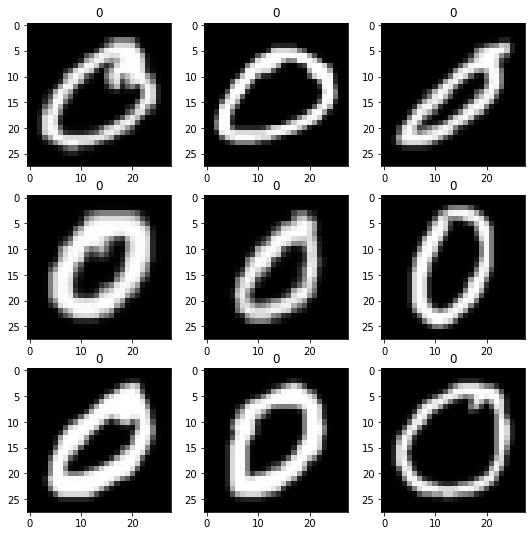

In [32]:
fig = plt.figure(figsize=(9, 9))
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.imshow(emnist_data.x_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(emnist_data.mapping[np.argmax(emnist_data.y_train[i])])

# Executing Training

In [ ]:
# Solving environment
!git clone https://github.com/juandados/fsdl.git
cd fsdl
!pip install pipenv
!pipenv install
cd lab1

Cloning into 'fsdl'...
remote: Enumerating objects: 210, done.
remote: Counting objects: 100% (210/210), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 210 (delta 59), reused 210 (delta 59), pack-reused 0
Receiving objects: 100% (210/210), 3.56 MiB | 22.76 MiB/s, done.
Resolving deltas: 100% (59/59), done.


In [ ]:
import os
os.environ['PYTHONPATH'] += ":."
!echo $PYTHONPATH

/content/fsdl/lab1


In [ ]:
!pipenv run training/run_experiment.py --save '{"dataset": "EmnistDataset", "model": "CharacterModel", "network": "mlp",  "train_args": {"batch_size": 256}}'

2020-09-10 07:54:40.527902: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Running experiment with config {'dataset': 'EmnistDataset', 'model': 'CharacterModel', 'network': 'mlp', 'train_args': {'batch_size': 256}} on GPU 0
EMNIST Dataset
Num classes: 80
Mapping: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z', 62: ' ', 63: '!', 64: '"', 65: '#', 66: '&', 67: "'", 68: '(', 69: ')', 70: '*', 71: '+', 72: ',', 73: '-', 74: '.',